<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r13_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-1-r13.csv?token=AKVFSOBQE7WEVKJNPHBZ7ZK63JGKG')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-normal-n-0-15-r13.csv?token=AKVFSOAU4VSVFXRBDCFEQ6C63JGLM')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,92,4,2,1,1,4,3,9,15,15,24,8,4,4,2,0.5,12,4,1,4,4,8,16,3,27,0
1,92,4,2,1,1,4,3,9,15,15,24,8,3,4,2,0.5,12,4,1,4,4,8,12,3,27,1
2,402,3,2,1,1,4,3,9,15,15,21,5,13,4,2,0.5,12,3,2,4,6,6,52,3,27,0
3,404,3,2,1,1,4,3,9,15,15,21,5,9,4,2,0.5,12,3,2,4,6,6,36,3,27,1
4,511,3,2,1,1,4,3,9,15,15,17,1,16,5,2,0.4,12,2,3,4,6,6,64,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54038,3276263,3,2,5,2,2,3,9,15,15,17,1,30089,5,2,0.4,19,5,2,6,10,6,601780,15,135,0
54039,3276270,3,2,5,3,2,3,9,15,15,17,1,30089,5,2,0.4,26,4,3,6,12,6,902670,15,135,0
54040,3276277,3,2,5,4,2,3,9,15,15,17,1,30089,5,2,0.4,33,3,4,6,12,6,1203560,15,135,0
54041,3276284,3,2,5,5,3,3,9,15,15,17,1,30089,5,2,0.4,40,2,5,6,10,6,2256675,15,135,0


In [6]:
df.shape

(54043, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-11-r13.csv?token=AKVFSOCO6G7PCJACTCL6OTK63JGKO')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-12-r13.csv?token=AKVFSOAXXM3UU5GITOILMOC63JHPW')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r13/2-fft-malicious-n-0-15-m-7-r13.csv?token=AKVFSOFKNO7OWYS5BRNHQZK63JHP4')

In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(29449, 26)
(52184, 26)
(29449, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.194373,0.030822,0.010490,-0.015310,NaN,-0.071607,-0.071894,0.585266,-0.174096,-0.436731,-0.046621,-0.123544,-0.144817,-0.204252,-0.191736,0.726343,-0.034501,0.030822,0.008066,0.074591
inport,-0.194373,1.000000,-0.047106,0.002549,-0.003720,NaN,-0.439608,0.028207,0.221033,0.429453,0.378576,0.150137,0.063035,-0.112868,-0.037928,-0.035921,0.508616,0.006099,-0.047106,-0.161764,-0.022405
cache_coherence_type,0.030822,-0.047106,1.000000,0.341283,-0.498107,NaN,-0.143755,0.062732,-0.029991,-0.313503,-0.301239,-0.529341,0.061267,-0.011473,0.037898,0.037062,0.005837,0.344337,1.000000,0.965741,-0.035777
flit_id,0.010490,0.002549,0.341283,1.000000,-0.104397,NaN,-0.219025,0.008964,0.009833,0.022048,0.011601,0.536392,-0.003380,0.006090,0.002062,0.018058,0.028211,0.697329,0.341283,0.288792,0.017152
flit_type,-0.015310,-0.003720,-0.498107,-0.104397,1.000000,NaN,0.319669,-0.013083,-0.014351,-0.032180,-0.016932,0.432134,-0.150112,0.148191,-0.001462,-0.006844,-0.041174,0.063785,-0.498107,-0.421496,-0.025034
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.071607,-0.439608,-0.143755,-0.219025,0.319669,NaN,1.000000,0.041817,-0.271621,-0.494404,-0.418507,-0.046095,-0.051585,0.199381,0.112489,0.101029,-0.340792,-0.068671,-0.143755,0.110459,-0.033782
traversal_id,-0.071894,0.028207,0.062732,0.008964,-0.013083,NaN,0.041817,1.000000,-0.102951,-0.048225,-0.002616,-0.003032,0.220905,0.221752,0.336910,0.268985,-0.042299,0.515621,0.062732,0.069866,-0.358773
hop_count,0.585266,0.221033,-0.029991,0.009833,-0.014351,NaN,-0.271621,-0.102951,1.000000,0.245601,-0.197634,0.095346,-0.152971,-0.170215,-0.245979,-0.210118,0.622287,-0.062897,-0.029991,-0.104721,0.047977
current_hop,-0.174096,0.429453,-0.313503,0.022048,-0.032180,NaN,-0.494404,-0.048225,0.245601,1.000000,0.874854,0.361540,0.073200,-0.152406,-0.060285,-0.053493,0.063193,-0.106371,-0.313503,-0.427266,0.035567


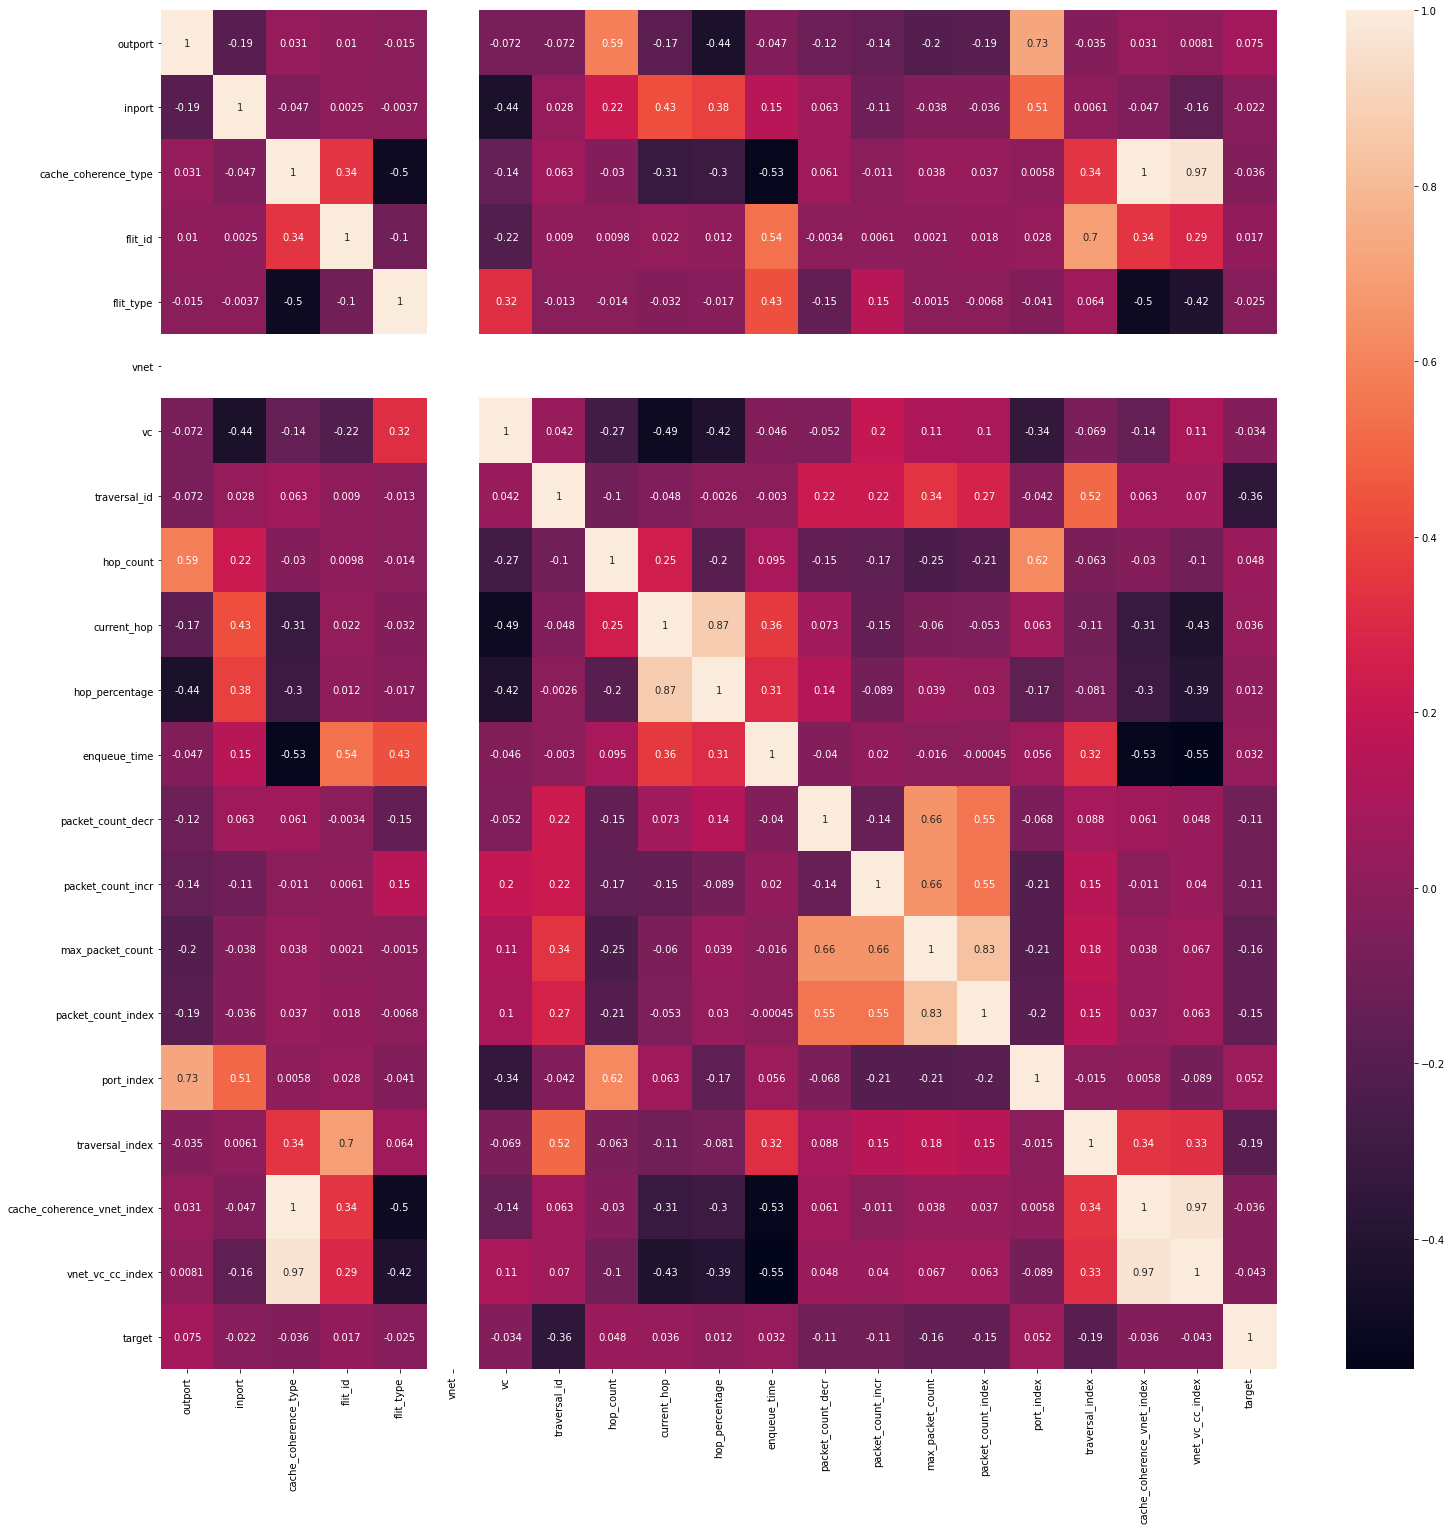

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

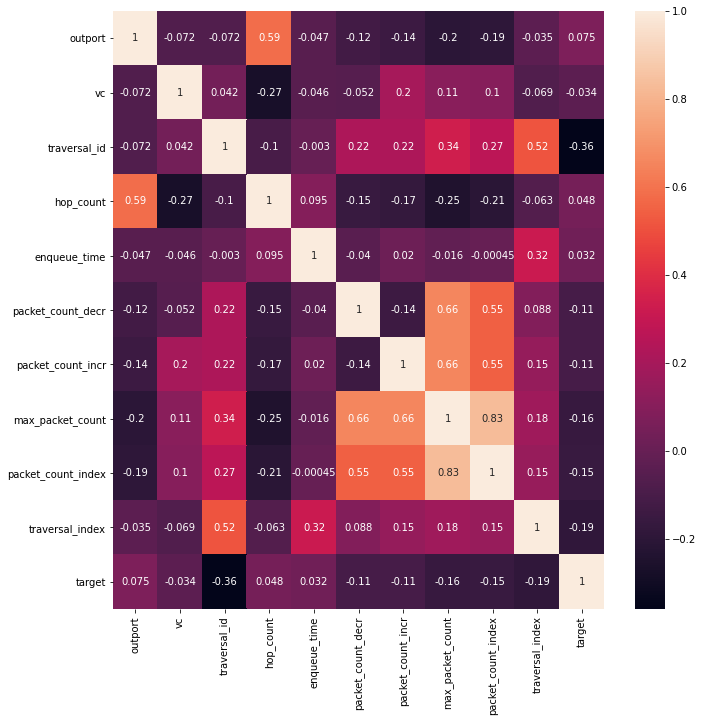

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

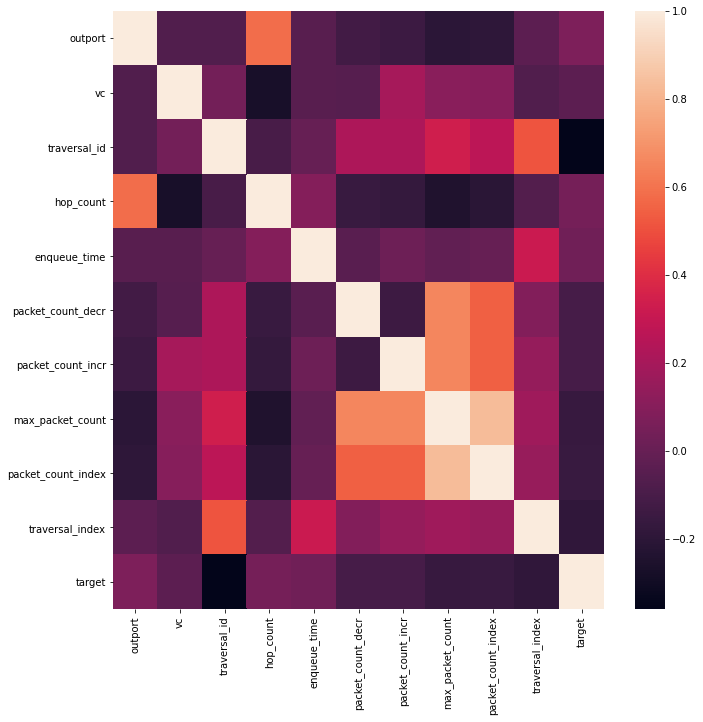

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000033,0.50,0.142857,0.038961,0.000000,0.038961,0.001924,0.000001
1,1.00,0.000000,0.000000,0.50,0.142857,0.038961,0.000000,0.038961,0.001924,0.000000
2,0.75,0.000000,0.000332,0.50,0.142857,0.025974,0.012987,0.038961,0.003207,0.000015
3,0.75,0.000000,0.000199,0.50,0.142857,0.025974,0.012987,0.038961,0.003207,0.000009
4,0.75,0.000000,0.000432,0.75,0.142857,0.012987,0.025974,0.038961,0.003207,0.000019
...,...,...,...,...,...,...,...,...,...,...
54038,0.75,0.000000,0.999967,0.75,0.267857,0.051948,0.012987,0.064935,0.005773,0.222263
54039,0.75,0.000000,0.999967,0.75,0.392857,0.038961,0.025974,0.064935,0.007056,0.333397
54040,0.75,0.000000,0.999967,0.75,0.517857,0.025974,0.038961,0.064935,0.007056,0.444531
54041,0.75,0.000000,0.999967,0.75,0.642857,0.012987,0.051948,0.064935,0.005773,0.833499


In [20]:
train_X[train_X.duplicated()].shape

(1, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000000,0.50,0.133333,0.040000,0.000000,0.040000,0.002026,0.000000
1,0.75,0.000000,0.000299,0.50,0.133333,0.026667,0.013333,0.040000,0.003376,0.000013
2,0.75,0.000000,0.000399,0.75,0.133333,0.013333,0.026667,0.040000,0.003376,0.000018
3,0.75,0.000000,0.000598,0.75,0.133333,0.000000,0.040000,0.040000,0.002026,0.000027
4,0.75,0.000000,0.000897,0.50,0.133333,0.226667,0.000000,0.226667,0.011479,0.000040
...,...,...,...,...,...,...,...,...,...,...
29444,0.75,0.000000,0.999967,0.75,0.250000,0.053333,0.200000,0.253333,0.053342,0.222261
29445,0.75,0.000000,0.999967,0.75,0.366667,0.040000,0.213333,0.253333,0.045240,0.333395
29446,0.75,0.000000,0.999967,0.75,0.483333,0.026667,0.226667,0.253333,0.035787,0.444529
29447,0.75,0.000000,0.999967,0.75,0.600000,0.013333,0.240000,0.253333,0.024983,0.833498


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    30078
1    23965
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  630.181968
9     traversal_index  215.027180
8  packet_count_index  123.313981
7    max_packet_count  106.633365
5   packet_count_decr   55.592526
6   packet_count_incr   51.088150
0             outport   36.144273
1                  vc   26.651825
3           hop_count   10.045193
4        enqueue_time    5.733065


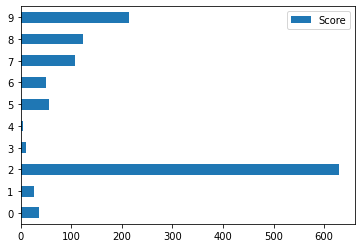

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.4478568272205
Test Prediction Score 95.51443790299972


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 78.2335563177018
Test Prediction Score 76.21684807603863
Test Prediction Score 75.76827736086115


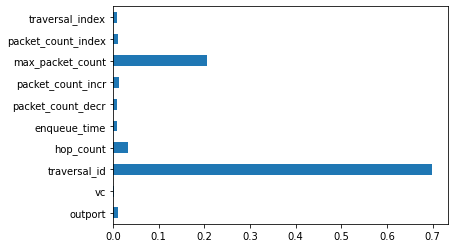

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

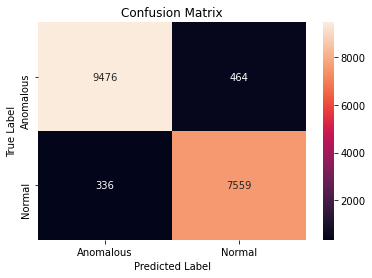

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9940
           1       0.94      0.96      0.95      7895

    accuracy                           0.96     17835
   macro avg       0.95      0.96      0.95     17835
weighted avg       0.96      0.96      0.96     17835



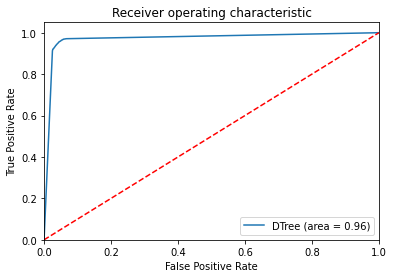

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r13l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99171453822359
Test Prediction Score 99.00196243341743


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 81.0146354714931
Test Prediction Score 79.54162195308908
Test Prediction Score 78.41013277191075


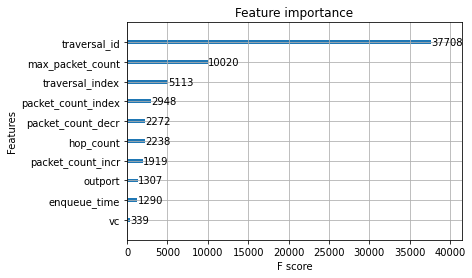

In [45]:
plot_importance(xgbc)
plt.show()

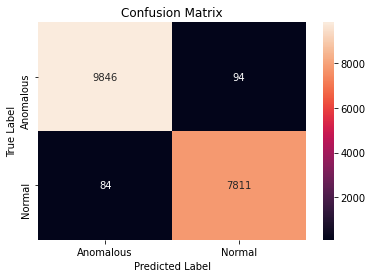

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9940
           1       0.99      0.99      0.99      7895

    accuracy                           0.99     17835
   macro avg       0.99      0.99      0.99     17835
weighted avg       0.99      0.99      0.99     17835



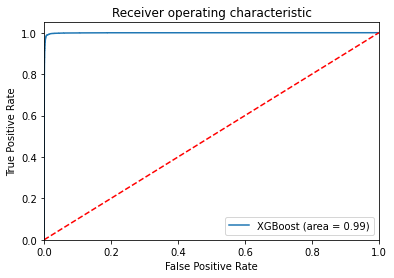

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()